# Coustomer Segmentation EDA

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

- IMPORTING LIBRARIES

- LOADING DATA

-  df CLEANING

-  DATA PREPROCESSING

-  DIMENSIONALITY REDUCTION

-  CLUSTERING

-  EVALUATING MODELS

-  PROFILING

-  CONCLUSION

-  END

## Importing Libraries

In [149]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Loding The df

In [150]:
df=pd.read_csv(r'C:\Project\Customer Personality Analysis\Notebook\Data\marketing_campaign.csv')

df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


## Clolumn Description 

| Column Name          | Description                                        |
|----------------------|----------------------------------------------------|
| Unnamed: 0           | Index of the record                                |
| ID                   | Unique ID for each customer                         |
| Year_Birth           | Birth year of the customer                          |
| Education            | Education level of the customer                     |
| Marital_Status       | Marital status of the customer                      |
| Income               | Annual income of the customer                       |
| Kidhome              | Number of young children in the household           |
| Teenhome             | Number of teenagers in the household                |
| Dt_Customer          | Date when the customer was enrolled                 |
| Recency              | Number of days since the last purchase              |
| MntWines             | Amount spent on wines in the last 2 years           |
| MntFruits            | Amount spent on fruits in the last 2 years          |
| MntMeatProducts      | Amount spent on meat products in the last 2 years   |
| MntFishProducts      | Amount spent on fish products in the last 2 years   |
| MntSweetProducts     | Amount spent on sweet products in the last 2 years  |
| MntGoldProds         | Amount spent on gold products in the last 2 years   |
| NumDealsPurchases    | Number of purchases made with a discount            |
| NumWebPurchases      | Number of purchases made through the web            |
| NumCatalogPurchases  | Number of purchases made using a catalog            |
| NumStorePurchases    | Number of purchases made directly in stores         |
| NumWebVisitsMonth    | Number of visits to the website per month           |
| AcceptedCmp3         | Whether the customer accepted Campaign 3            |
| AcceptedCmp4         | Whether the customer accepted Campaign 4            |
| AcceptedCmp5         | Whether the customer accepted Campaign 5            |
| AcceptedCmp1         | Whether the customer accepted Campaign 1            |
| AcceptedCmp2         | Whether the customer accepted Campaign 2            |
| Complain             | Whether the customer made a complaint               |
| Z_CostContact        | Cost of contacting the customer                     |
| Z_Revenue            | Revenue from the campaign                           |
| Response             | Whether the customer responded to the campaign      |


**In this section** 
* df Cleaning
* Feature Engineering 

In order to, get a full grasp of what steps should I be taking to clean the dfset. 
Let us have a look at the information in df.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

**From the above output we can conclue and note that**
- There is unnecessary `Unnamed: 0` column.
- `Dt_Customer` that indicates the date a customer joined the database is not parsed as DateTime
- There are some `categorical` features in our data frame; as there are some features in (dtype: object). So we will need to encode them into `numeric` forms later.
- There are missing values in income

First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [152]:
df.dropna(inplace=True)

After removeing the nullvalues the shape of the DataFrame

In [153]:
df.shape

(2216, 30)

Removing the `Unnamed: 0` column

In [154]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Changeing the datatype of `Dt_coustomer` to datetime

In [155]:
df.Dt_Customer=pd.to_datetime(df.Dt_Customer)

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [156]:
dates=[]
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [157]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [158]:
for i in df.columns[df.dtypes == 'object']:
    print(f'Total categories in the feature {i}:\n  \n',df[i].value_counts())

Total categories in the feature Education:
  
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Total categories in the feature Marital_Status:
  
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In the next bit, I will be performing the following steps to engineer some new features:

- Extract the "`Age`" of a customer by the "`Year_Birth`" indicating the birth year of the respective person.
- Create another feature "`Spent`" indicating the total amount spent by the customer in various categories over the span of two years.
- Create another feature "`Living_With`" out of "`Marital_Status`" to extract the living situation of couples.
- Create a feature "`Children`" to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating "`Family_Size`"
- Create a feature "`Is_Parent`" to indicate parenthood status
- Lastly, I will create three categories in the "`Education`" by simplifying its value counts.
- Dropping some of the redundant features

In [159]:
# Age of customer today
df['Age']=2023-df.Year_Birth

In [160]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [161]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


In [162]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [163]:
#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


In [164]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [165]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [166]:
#Renameing the column name to better understand

data=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"},inplace=True)


In [167]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df.drop(to_drop, axis=1,inplace=True)

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02


Relative Plot of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

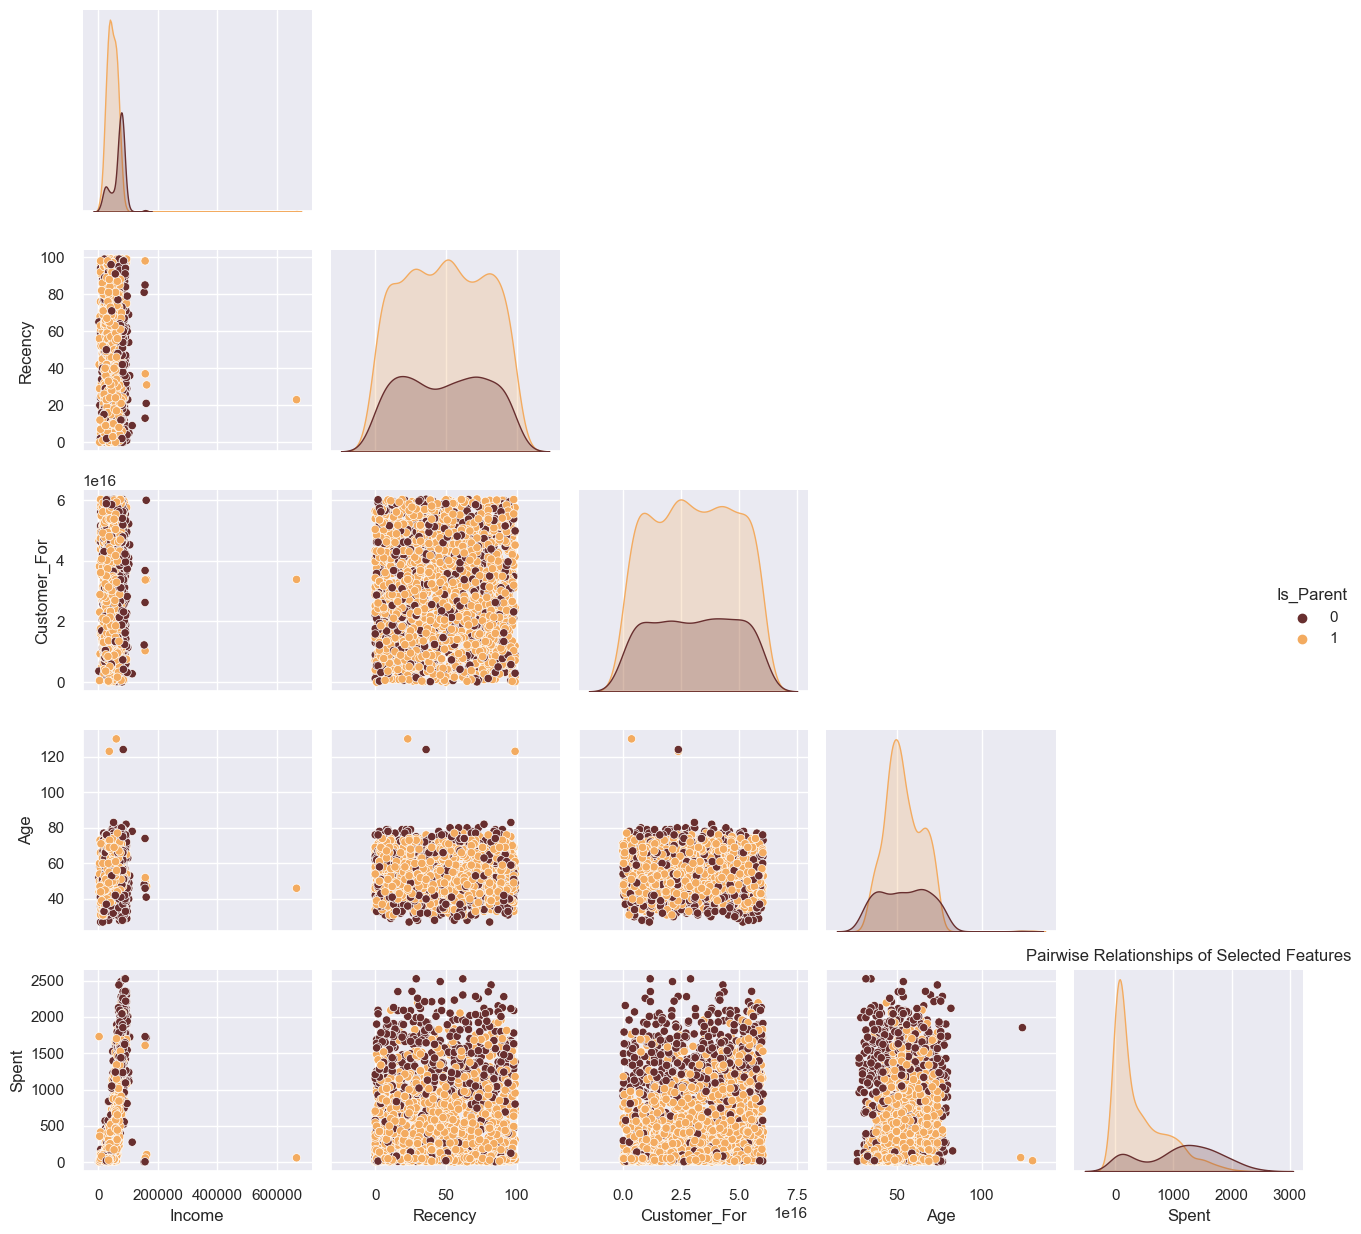

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Setting up colors preferences for dark mode
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("dark"))

# Defining the color palette
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting the selected features
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue="Is_Parent", palette=["#682F2F", "#F3AB60"], corner=True)

# Adjusting the plot aesthetics
plt.title("Pairwise Relationships of Selected Features")
plt.tight_layout()

# Displaying the plot
plt.show()


Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.



In [177]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

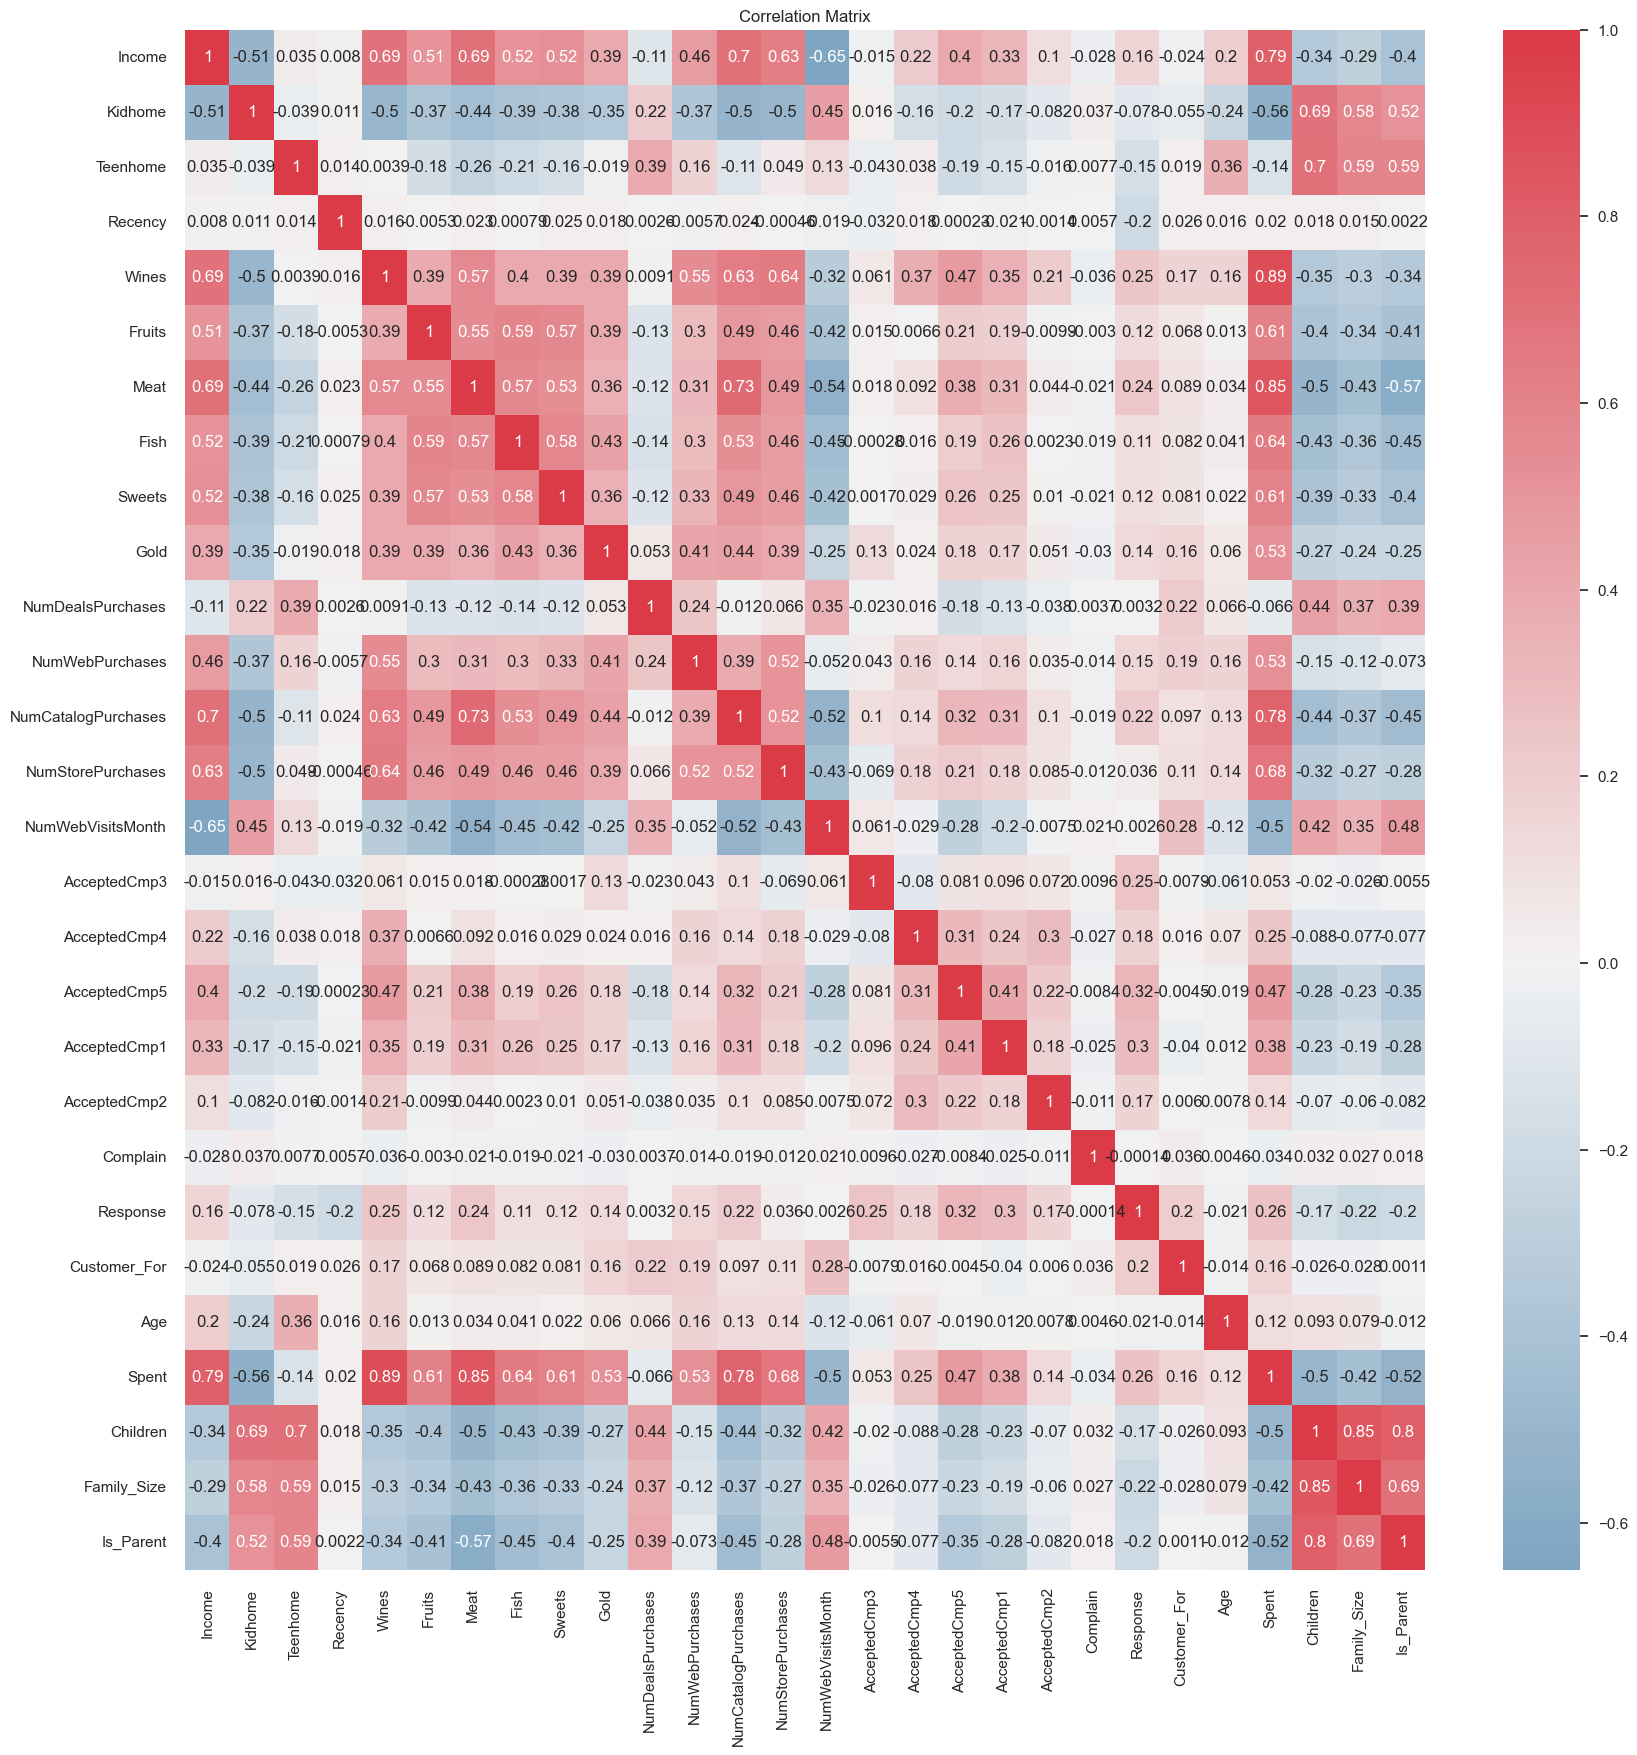

In [193]:
# Filter out non-numeric columns
data = df.select_dtypes(include=[np.number])

# Correlation matrix
corrmat = data.corr()

# Create a custom color map
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

## Data preprocessing 

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [196]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [198]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [199]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")


All features are now scaled


In [200]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction with PCA

In this problem, there are multiple factors, known as attributes or features, that will be used for the final classification. However, a higher number of features can make the task more challenging. Moreover, many of these features might be correlated and redundant. To address this issue, dimensionality reduction will be performed on the selected features before feeding them into a classifier.

Dimensionality reduction aims to decrease the number of random variables considered by obtaining a set of principal variables. One commonly used technique for dimensionality reduction is Principal Component Analysis (PCA). PCA reduces the dimensionality of the dataset, making it more interpretable while minimizing the loss of information.

### Steps in this section:

1. Dimensionality reduction with PCA.
2. Plotting the reduced dataframe.

### Dimensionality Reduction with PCA

In this project, the dimensions will be reduced to 3 using PCA.


In [201]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.424437e-18,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,-4.497106e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,4.657717e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


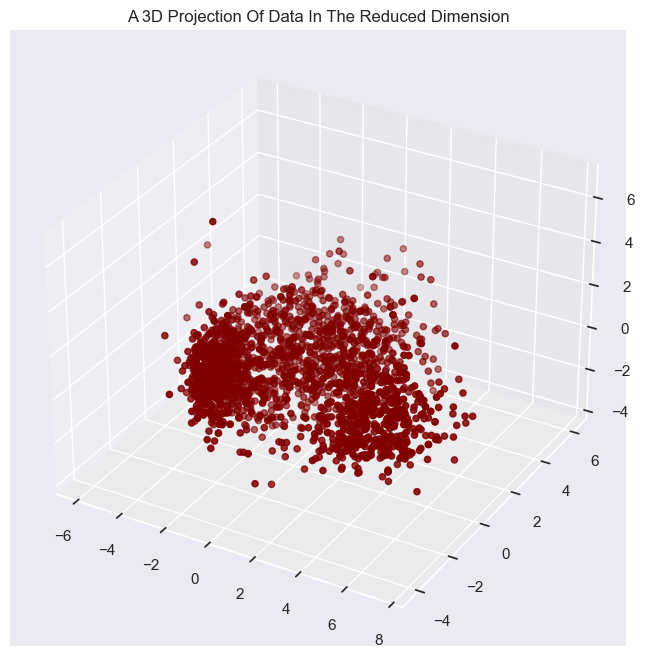

In [202]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering via Agglomerative Clustering

Now that the attributes have been reduced to three dimensions, the next step is to perform clustering using the Agglomerative clustering algorithm. Agglomerative clustering is a hierarchical clustering method that involves merging examples until the desired number of clusters is achieved.

### Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed.
2. Clustering via Agglomerative Clustering.
3. Examining the clusters formed via scatter plot.

### Elbow Method to Determine the Number of Clusters

The Elbow method is a technique used to determine the optimal number of clusters in a dataset. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point, which represents the optimal number of clusters.

### Clustering via Agglomerative Clustering

Agglomerative clustering will be performed using the reduced three-dimensional dataset. This algorithm iteratively merges the closest examples or clusters until the desired number of clusters is reached.

### Examining the Clusters Formed via Scatter Plot

To gain insights into the clustering results, a scatter plot can be created to visualize the clusters formed. This plot allows for the examination of the distribution and separation of data points within each cluster.


Elbow Method to determine the number of clusters to be formed:


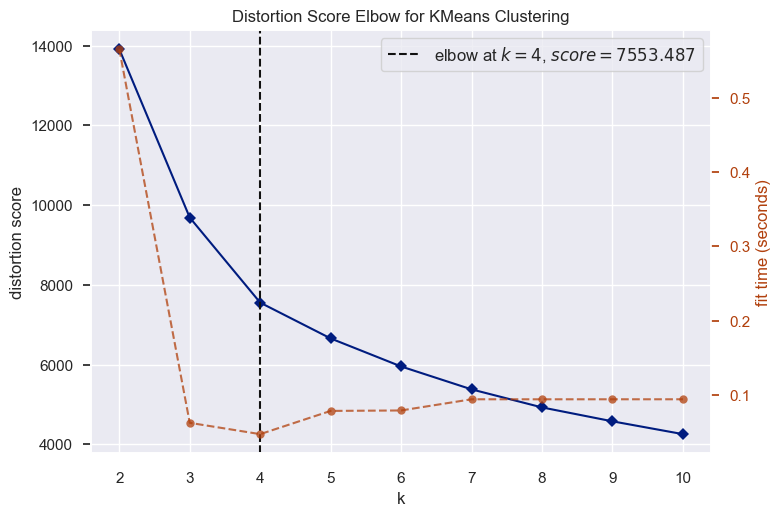

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [204]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

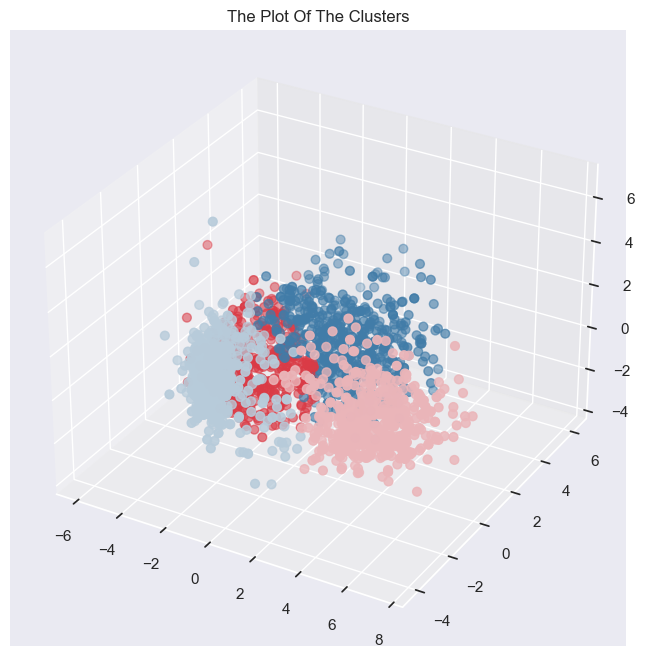

In [205]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluating the Modals

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

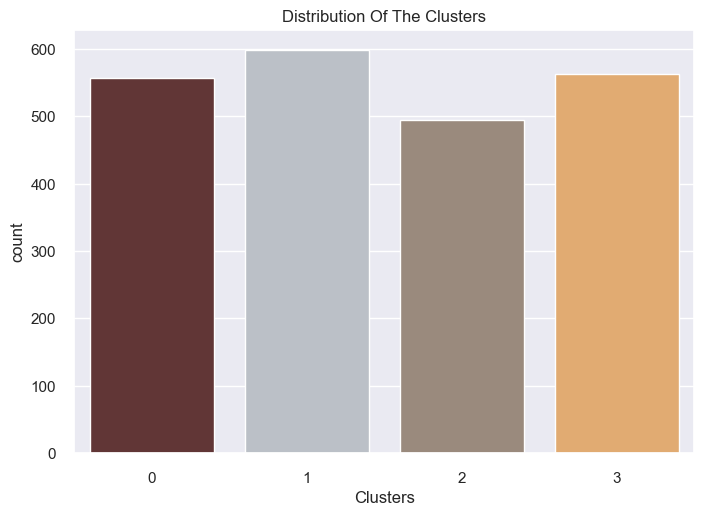

In [206]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

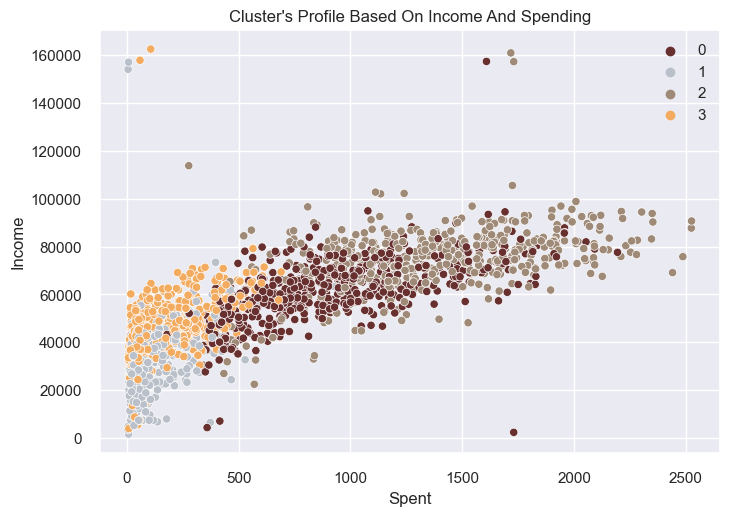

In [207]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & low income
- group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

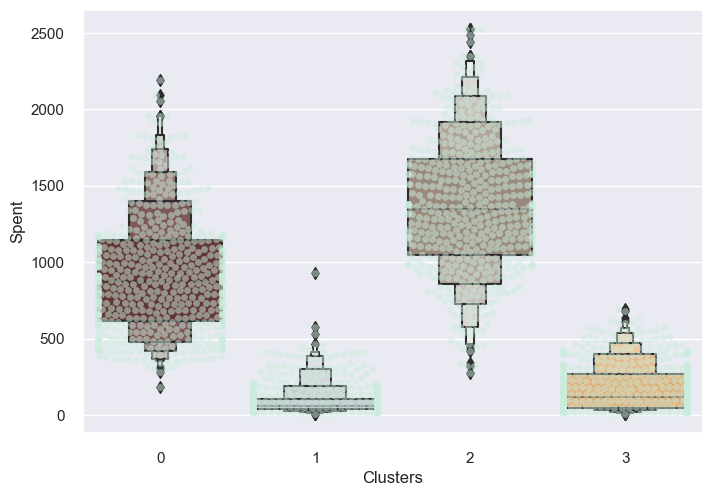

In [208]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

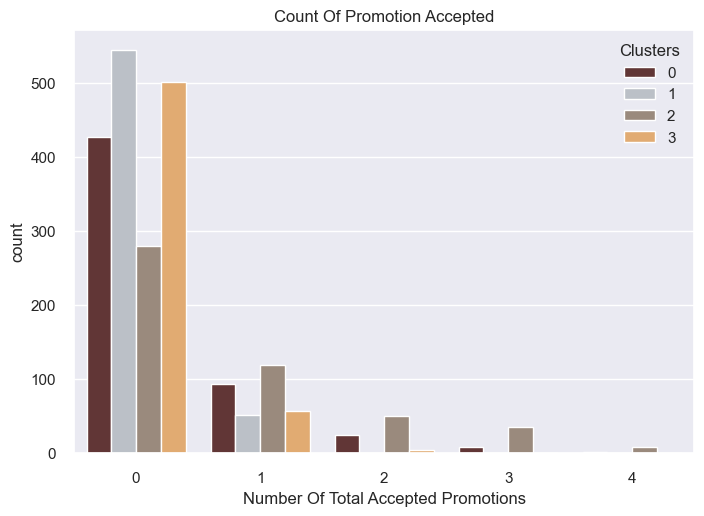

In [209]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

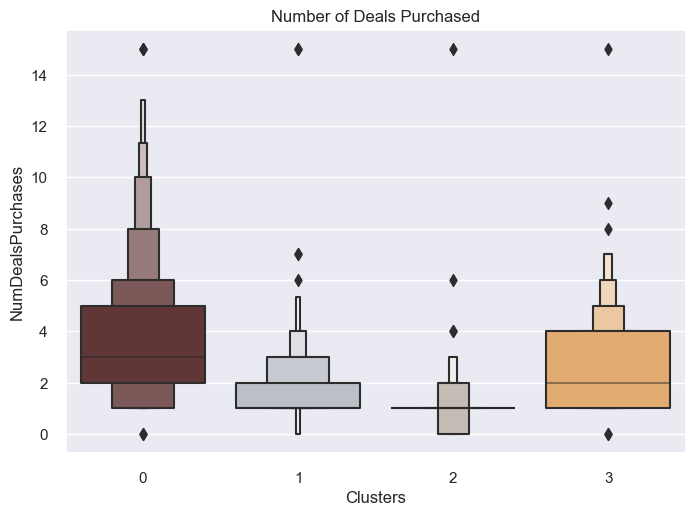

In [210]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly

## Profiling

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

In [224]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Clusters,Total_Promos
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.009042,0.150542,3.056091e+16,54.086347,607.268083,0.947559,2.593128,0.714286,1.481465,0.298373
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.094678,0.357683,1.749556e+16,11.701599,602.513364,0.749466,0.906236,0.451856,1.123379,0.679570
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,1.555200e+16,46.000000,69.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,3.075840e+16,53.000000,397.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,4.570560e+16,64.000000,1048.000000,1.000000,3.000000,1.000000,3.000000,0.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,6.039360e+16,83.000000,2525.000000,3.000000,5.000000,1.000000,3.000000,4.000000


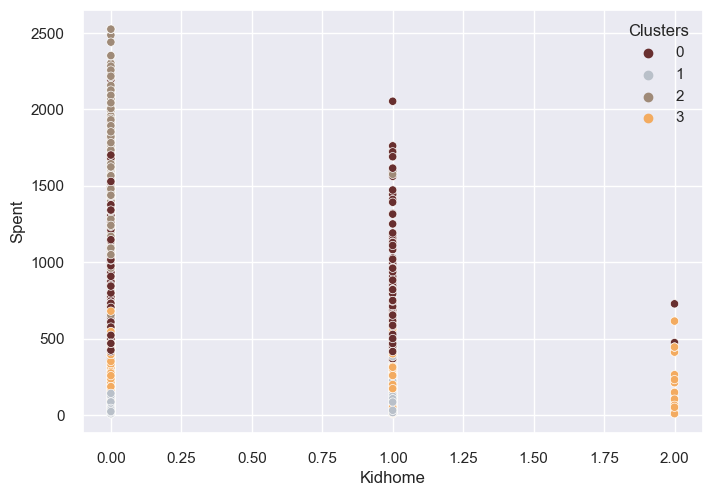

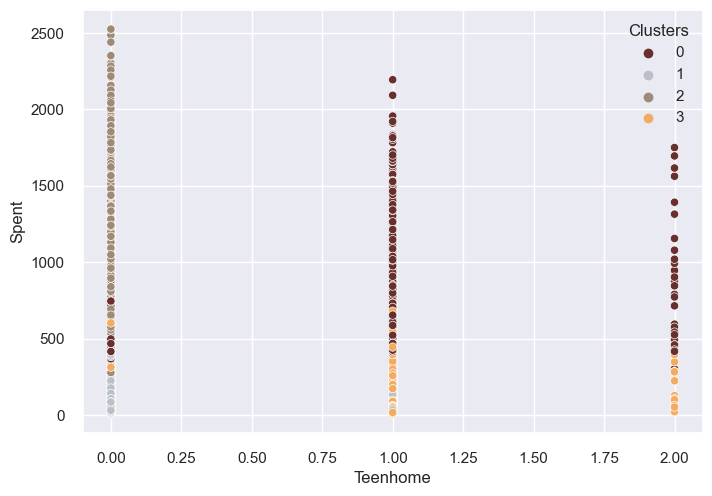

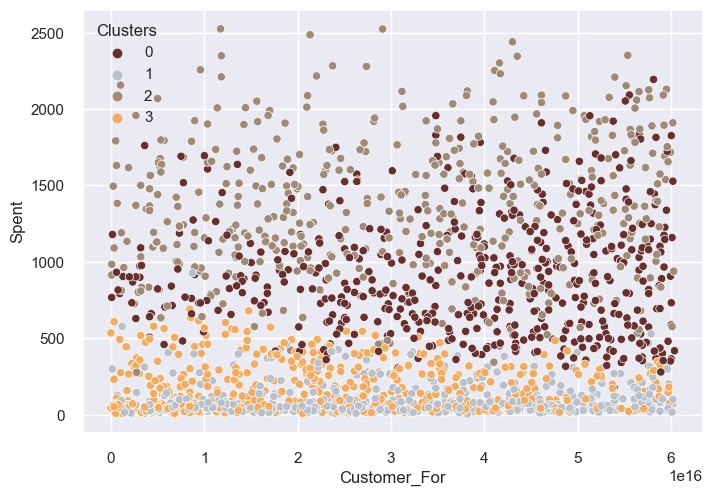

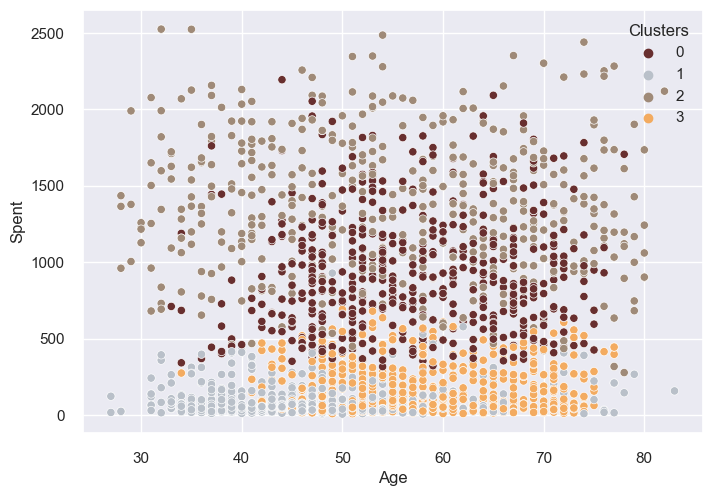

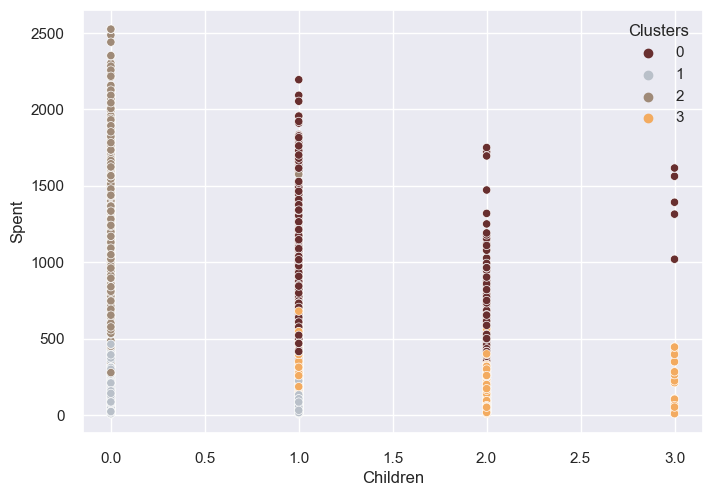

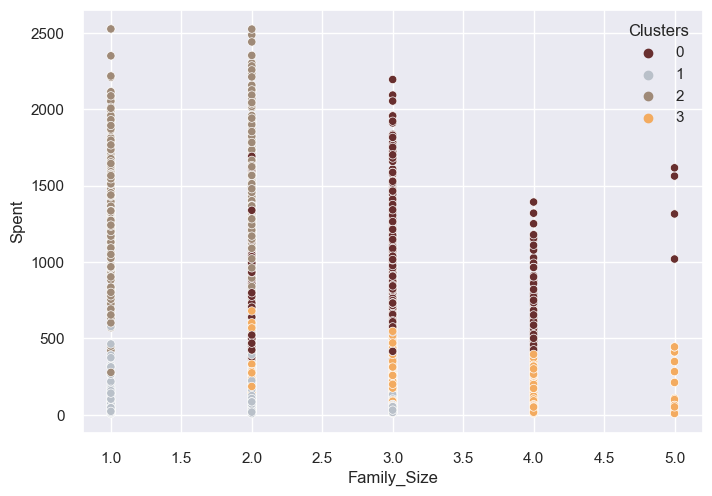

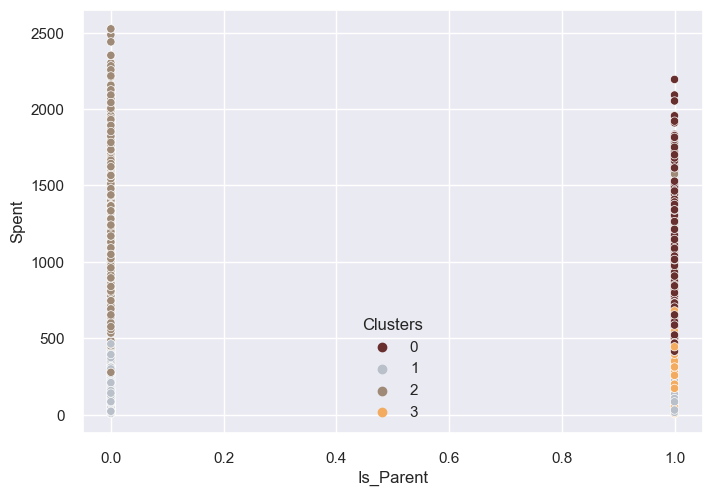

Error: One or more columns are missing in the 'data' dataframe.
Error: One or more columns are missing in the 'data' dataframe.


<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:
    try:
        plt.figure()
        sns.scatterplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=pal)
        plt.show()
    except KeyError:
        print(f"Error: One or more columns are missing in the 'data' dataframe.")
    except:
        print("An unexpected error occurred.")


### About Cluster 0
- They are definitely parents.
- There are a maximum of 4 members in the family and a minimum of 2.
- Single parents are a subset of this group.
- Most of them have a teenager at home.
- They are relatively older.

### About Cluster 1
- They are definitely not parents.
- There are a maximum of 3 family members.
- There is a slight majority of couples over single individuals.
- They span all ages.
- They belong to a high-income group.

### About Cluster Number 2
- The majority of these people are parents.
- There are a maximum of 3 members in the group.
- They mostly have 1 child (not teenagers in the group).
- They are relatively younger.

### About Cluster Number 3
- They are definitely parents.
- There are a maximum of 5 members in the family and a minimum of 2.
- The majority of them have a teenager at home.
- They are relatively older.
- They belong to a lower-income group.
